Wall time: 43.2 s
Test Accuracy: 83.91061452513966
Train Accuracy: 84.80446927374302
Test Precision Score:  0.8374269005847953
Test Recall Score:  0.9930651872399445
Test f1 Score:  0.9086294416243654
              precision    recall  f1-score   support

           0       0.88      0.20      0.33       174
           1       0.84      0.99      0.91       721

    accuracy                           0.84       895
   macro avg       0.86      0.60      0.62       895
weighted avg       0.84      0.84      0.80       895



Text(0.5, 15.0, 'Predicted Label')

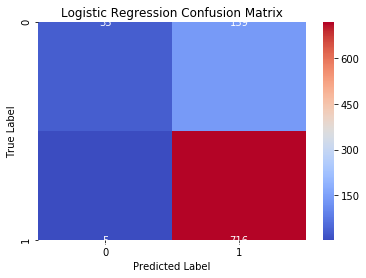

In [5]:

import numpy as np
import pandas as pd

from sklearn import metrics

df=pd.read_csv("F:\\gnr652\\assignment-rw\\FlightDelays.csv")
from sklearn.model_selection import train_test_split

class LogisticRegression:  
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):  
        self.lr = lr  
        self.num_iter = num_iter  
        self.fit_intercept = fit_intercept  
        self.verbose = verbose  
     
    def __add_intercept(self, X):  
        intercept = np.ones((X.shape[0], 1))  
        return np.concatenate((intercept, X), axis=1)  
     
    def __sigmoid(self, z):  
        return 1 / (1 + np.exp(-z))  
    def __loss(self, h, y):  
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()  
     
    def fit(self, X, y):  
        if self.fit_intercept:  
            X = self.__add_intercept(X)  
         
        # weights initialization  
        self.theta = np.zeros(X.shape[1])  
         
        for i in range(self.num_iter):  
            z = np.dot(X, self.theta)  
            h = self.__sigmoid(z)  
            gradient = np.dot(X.T, (h - y)) / y.size  
            self.theta -= self.lr * gradient  
             
            z = np.dot(X, self.theta)  
            h = self.__sigmoid(z)  
            loss = self.__loss(h, y)  
                 
            if(self.verbose ==True and i % 10000 == 0):  
                print(f'loss: {loss} \t')  
     
    def predict_prob(self, X):  
        if self.fit_intercept:  
            X = self.__add_intercept(X)  
     
        return self.__sigmoid(np.dot(X, self.theta))  
     
    def predict(self, X):  
        return self.predict_prob(X).round()



del df['FL_DATE']

import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
    df.loc[index, 'DEP_TIME'] = math.floor(row['DEP_TIME'] / 100)
df.head()

mee=df['DISTANCE'].mean()
mx=df['DISTANCE'].max()
#print(mee)
sd=df['DISTANCE'].std()
mn=df['DISTANCE'].min()
#print(sd)
deno=mx-mn

for index, row in df.iterrows():
    df.loc[index, 'DISTANCE'] = (df.loc[index, 'DISTANCE']-mn)/deno
    #df.loc[index, 'DEP_TIME'] = math.floor(row['DEP_TIME'] / 100)
df.head()





df['class'] = df['Flight Status'].apply(lambda x : 1 if x == "ontime" else 0)


X=df.drop("class",1)



Y=df['class']



df=pd.get_dummies(df, columns=['DEST' ,'FL_NUM','ORIGIN','CARRIER','TAIL_NUM', 'CRS_DEP_TIME','DEP_TIME', 'DAY_WEEK','DISTANCE','DAY_OF_MONTH'])



del df['Flight Status']


X=df.drop("class",1)


pd.set_option('display.max_rows',900)

msk = np.random.rand(len(df)) < 0.6

X_train = X[msk]

X_test = X[~msk]

Y_train = Y[msk]

Y_test = Y[~msk]
Y_train.reset_index(inplace=True, drop=True)
Y_test.reset_index(inplace=True, drop=True)
model = LogisticRegression(lr=0.01, num_iter=10000)  
get_ipython().magic(u'time model.fit(X_train, Y_train)')
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)
q = pd.DataFrame(np.around(preds_test))
q['train']=pd.DataFrame(np.around(preds_train))
q['class']=Y_test
q['ctr']=Y_train

print('Test Accuracy:',q.loc[q[0]==q['class']].shape[0] / q.shape[0] * 100)
print('Train Accuracy:',q.loc[q['train']==q['ctr']].shape[0] / q.shape[0] * 100)

print('Test Precision Score: ',metrics.precision_score(Y_test, preds_test))
print('Test Recall Score: ',metrics.recall_score(Y_test, preds_test))
print('Test f1 Score: ',metrics.f1_score(Y_test, preds_test))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
import seaborn as sns
print(classification_report(Y_test, preds_test))
lr_cm = confusion_matrix(Y_test, preds_test)
ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

